# Base Médica

### Importe de Librerías

In [2]:
#Librerías para evitar avisos de warning al momento de ejecución
from warnings import filterwarnings
filterwarnings('ignore')
#Librerías Para manipulación de dataframes
import pandas as pd
#Librerías para funciones aritméticas o matriciales
import numpy as np
#Librerías para visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
#Librerías Machine Learning
#Segmentación de base entre Train y Test
from sklearn.model_selection import train_test_split
#Iteración de parametros
from sklearn.model_selection import GridSearchCV
#Estandarización gaussiana de columnas
from sklearn.preprocessing import StandardScaler
#Modelo Logístico

from sklearn.linear_model import LogisticRegression as LR
# Modelo de Árbol de Decisión
from sklearn import tree
#Modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
# importacion de métricas de desempeño
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix


### Autorización de uso desde Colaboratory

In [3]:
import zipfile
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Cargue de Información

In [4]:
base=pd.read_csv("/content/drive/MyDrive/Prueba/diabetic_data.csv")

# Detalle de Campos

**Feature name	Type	Description and values	% missing**

---


* **Encounter ID**	*Numeric*	Unique identifier of an encounter	      0%
* **Patient number**	*Numeric* Unique identifier of a patient      	0%
* **Race**	*Nominal	Values*: Caucasian, Asian, African American, Hispanic, and other	2%
* **Gender**	*Nominal	Values*: male, female, and unknown/invalid	0%
* **Age**	*Nominal*	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)	0%
* **Weigh**t	*Numeric*	Weight in pounds.	97%
* **Admission type**	*Nominal*	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available	0%
* **Discharge disposition**	*Nominal*	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available	0%
* **Admission source**	*Nominal*	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital	0%
* **Time in hospital**	*Numeric*	Integer number of days between admission and discharge	0%
* **Payer code**	Nominal	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay	52%
* **Medical specialty**	*Nominal*	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon	53%
* **Number of lab procedures**	*Numeric*	Number of lab tests performed during the encounter	0%
* **Number of procedures**	*Numeric*	Number of procedures (other than lab tests) performed during the encounter	0%
* **Number of medications**	*Numeric*	Number of distinct generic names administered during the encounter	0%
* **Number of outpatient visits**	*Numeric*	Number of outpatient visits of the patient in the year preceding the encounter	0%
* **Number of emergency visits**	*Numeric*	Number of emergency visits of the patient in the year preceding the encounter	0%
* **Number of inpatient visits**	*Numeric*	Number of inpatient visits of the patient in the year preceding the encounter	0%
* **Diagnosis 1**	*Nominal*	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values	0%
* **Diagnosis 2**	*Nominal*	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values	0%
* **Diagnosis 3**	*Nominal*	Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values	1%
* **Number of diagnoses**	*Numeric*	Number of diagnoses entered to the system	0%
* **Glucose serum test result**	*Nominal*	Indicates the range of the result or if the test was not taken. **Values:** “>200,” “>300,” “normal,” and “none” if not measured	0%
* **A1c test result**	*Nominal*	Indicates the range of the result or if the test was not taken. **Values:** “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.	0%
* **Change of medications**	*Nominal*	Indicates if there was a change in diabetic medications (either dosage or generic name). **Values**: “change” and “no change”	0%
* **Diabetes medications**	*Nominal*	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”	0%
* **24 features for medications**	*Nominal*	For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed	0%
* **Readmitted**	*Nominal*	Days to inpatient readmission. **Values:** “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.	0%

Se extrajo información de la base de datos para los encuentros que cumplieron con los siguientes criterios.
	

1.   Es un encuentro hospitalario (ingreso hospitalario).
2.  Es un encuentro “diabético”, es decir, durante el cual se ingresó al sistema cualquier tipo de diabetes como diagnóstico.
3. La estancia hospitalaria fue de al menos 1 día y como máximo 14 días.
4. Durante el encuentro se realizaron pruebas de laboratorio.
5. Se administraron medicamentos durante el encuentro.

# Exploración Inicial de Base

Dado que las variables como encounter_id patient_nbr son identificadores de los clientes se van dejar como index dentre de la base para que no sean tenido en cuenta como variable.

In [7]:
base.set_index(['encounter_id','patient_nbr'], inplace=True)
base.head(3)

,,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


In [8]:
base.shape

(101766, 48)

##Asignación de códigos a  columnas de la base

In [9]:
admission_type_id1={1:"Emergency",2:"Urgent",3:"Elective",4:"Newborn",5:"Not Available",6:"NULL",7:"Trauma Center",8:"Not Mapped"}
admission_source_id1={1:"Physician Referral",2:"Clinic Referral",3:"HMO Referral",4:"Transfer from a hospital",
5: "Transfer from a Skilled Nursing Facility (SNF)",6: "Transfer from another health care facility",
7: "Emergency Room",8: "Court/Law Enforcement",9: "Not Available",10: "Transfer from critial access hospital",
11:"Normal Delivery",12: "Premature Delivery",13: "Sick Baby",14: "Extramural Birth",15:"Not Available",
17:"NULL",18: "Transfer From Another Home Health Agency",19:"Readmission to Same Home Health Agency",
20: "Not Mapped",21:"Unknown/Invalid",22: "Transfer from hospital inpt/same fac reslt in a sep claim",
23: "Born inside this hospital",24: "Born outside this hospital",25: "Transfer from Ambulatory Surgery Center",
26:"Transfer from Hospice"}


In [10]:
discharge_disposition_id1={1:"Discharged to home",2:"Discharged/transferred to another short term hospital",
3:"Discharged/transferred to SNF",4:"Discharged/transferred to ICF",
5:"Discharged/transferred to another type of inpatient care institution",
6:"Discharged/transferred to home with home health service",
7:"Left AMA",8:"Discharged/transferred to home under care of Home IV provider",
9:"Admitted as an inpatient to this hospital",10:"Neonate discharged to another hospital for neonatal aftercare",
11:"Expired",12:"Still patient or expected to return for outpatient services",
13:"Hospice / home",14:"Hospice / medical facility",
15:"Discharged/transferred within this institution to Medicare approved swing bed",
16:"Discharged/transferred/referred another institution for outpatient services",
17:"Discharged/transferred/referred to this institution for outpatient services",
18:"NULL",19:"Expired at home. Medicaid only, hospice.",
20:"Expired in a medical facility. Medicaid only, hospice.",
21:"Expired, place unknown. Medicaid only, hospice.",
22:"Discharged/transferred to another rehab fac including rehab units of a hospital.",
23:"Discharged/transferred to a long term care hospital.",
24:"Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
25:"Not Mapped",26:"Unknown/Invalid",30:"Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
27:"Discharged/transferred to a federal health care facility.",
28:"Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
29:"Discharged/transferred to a Critical Access Hospital (CAH)."}

In [11]:
base["admission_source_id"]=base["admission_source_id"].map(admission_source_id1)
base["discharge_disposition_id"]=base["discharge_disposition_id"].map(discharge_disposition_id1)
base["admission_type_id"]=base["admission_type_id"].map(admission_type_id1)

In [ ]:
base.value_counts("admission_source_id")/base.shape[0]

admission_source_id
Emergency Room                                               0.564963
Physician Referral                                           0.290519
NULL                                                         0.066633
Transfer from a hospital                                     0.031317
Transfer from another health care facility                   0.022247
Clinic Referral                                              0.010848
Transfer from a Skilled Nursing Facility (SNF)               0.008402
HMO Referral                                                 0.001838
Not Mapped                                                   0.001582
Not Available                                                0.001228
Court/Law Enforcement                                        0.000157
Transfer from hospital inpt/same fac reslt in a sep claim    0.000118
Transfer from critial access hospital                        0.000079
Normal Delivery                                              0.000020


## Casteo de nombre de Columnas 
Formato de Columnas para mantener un buen formato entre los nombre de las columnas

In [16]:
labels=base.isnull().sum().index
for i in labels:
    clear = i.replace("-","_")
    clear = clear.replace(" ","")
    clear = clear.lower()
    base.rename(columns={i:clear},inplace = True)    

In [ ]:
base.columns  

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'a1cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted'],
      dtype='object')

## Validación de Columnas en la Base y registros duplicados

In [ ]:
base.shape

(101766, 48)

Tipo de variables por columna


In [ ]:
base.dtypes

race                        object
gender                      object
age                         object
weight                      object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
a1cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

### registros duplicados

In [ ]:
base.duplicated().sum()
# No existen registros duplicados a nivel de fila

0

### Valores únicos
Revisar si hay variables que siempre o prácticamente siempre toman el mismo valor: tomar siempre el mismo valor no aporta información al modelo

In [ ]:
df_unique = pd.DataFrame(base.nunique(),columns=['val_unicos'])
df_unique[df_unique.val_unicos<2]

,val_unicos
examide,1
citoglipton,1


In [ ]:
# Las variables "examide" y "citoglipton" no aportan por lo cual serán eliminadas de la base
base=base.drop(['examide','citoglipton'], axis=1)

### Categorías por Variable

In [ ]:
a=base.columns

In [ ]:
for i in a:
  print(pd.value_counts(base[i])/base.shape[0])


Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64
[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: age, dtype: float64
?            0.968585
[75-100)     0.013128
[50-75)      0.008814
[100-125)    0.006142
[125-150)    0.001425
[25-50)      0.000953
[0-25)       0.000472
[150-175)    0.000344
[175-200)    0.000108
>200         0.000029
Name: weight, dtype: float64
Emergency        0.530531
Elective         0.185416
Urgent           0.181593
NULL             0.051992
Not Available    0.047020
Not Mapped       0.003144
Trauma Center    0.000206
Newborn          0.000098

## Exploración Variables con Información Demográfica vs Objetivo

### Race

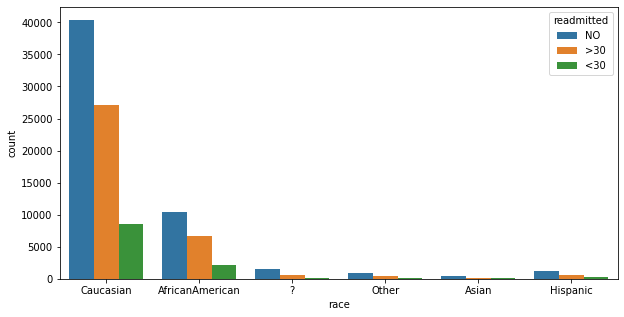

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="race", hue='readmitted', data=base)

### Gender

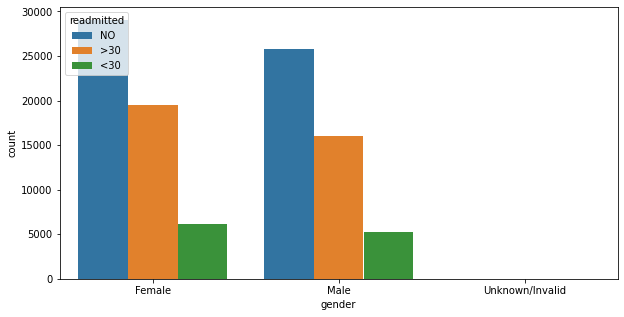

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="gender", hue='readmitted', data=base)

### Age

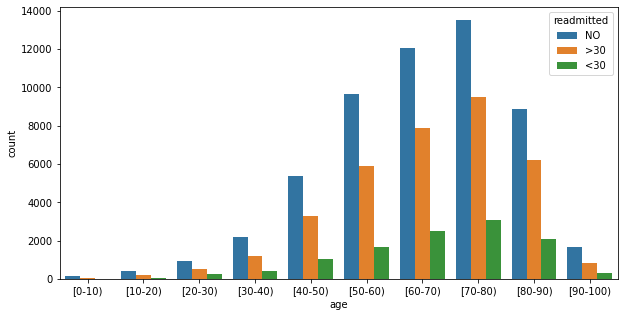

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="age", hue='readmitted', data=base)

## Variables categoricas médicas vs Objetivo

### admission_type_id

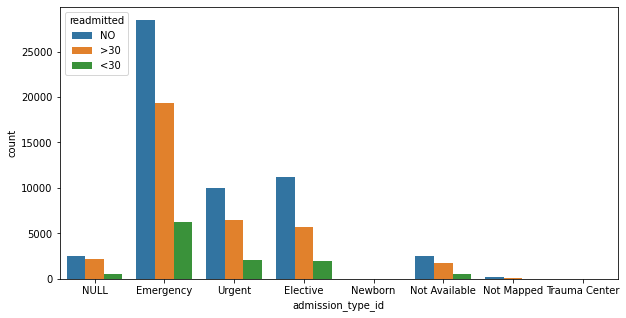

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="admission_type_id", hue='readmitted', data=base)

### admission_source_id
Se requiere de una re-agrupación de categorias, ya que la mayoria tiene bajo procetaje de resgistros.

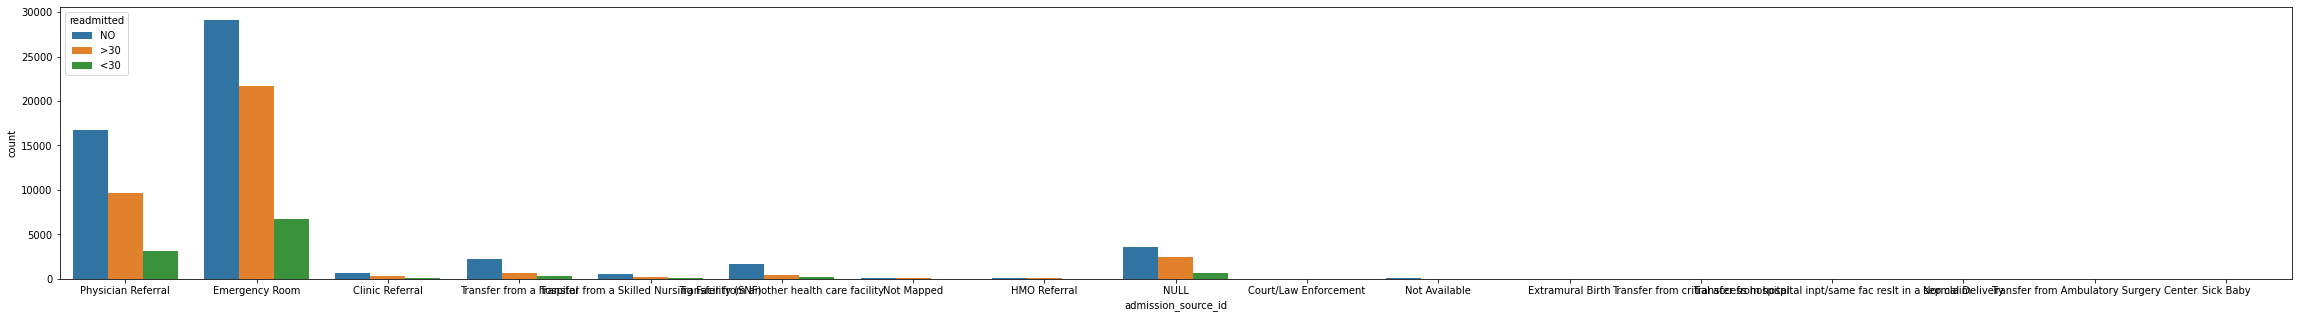

In [ ]:
plt.figure(figsize=(40,5))
sns.countplot(x="admission_source_id", hue='readmitted', data=base)

### discharge_disposition_id
Se requiere de una re-agrupación de categorias, ya que la mayoria tiene bajo procetaje de resgistros.

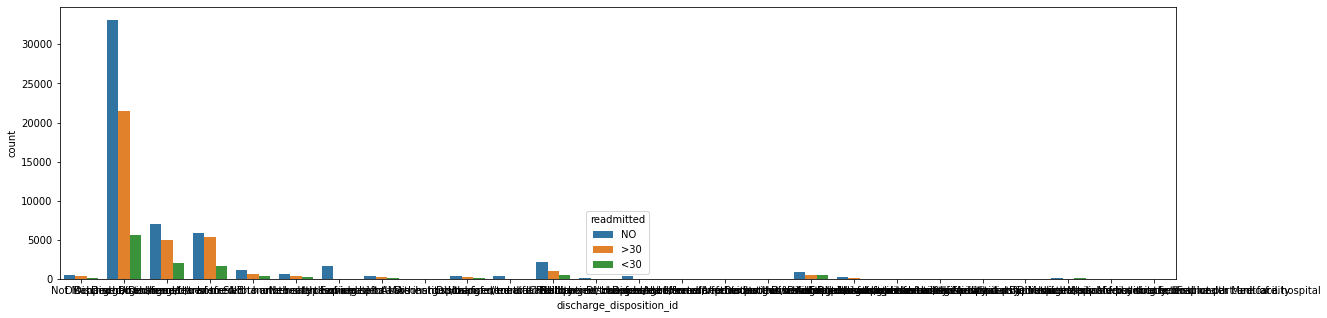

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="discharge_disposition_id", hue='readmitted', data=base)

### medical_specialty
Se requiere de una re-agrupación de categorias, ya que la mayoria tiene bajo procetaje de resgistros.

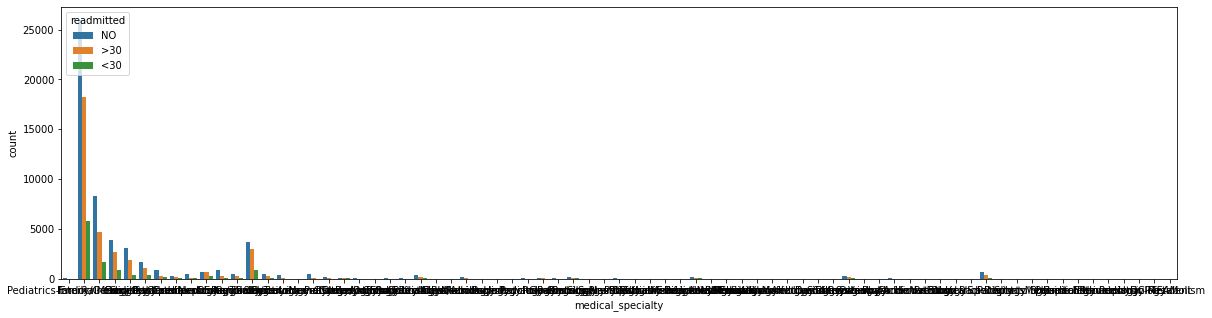

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="medical_specialty", hue='readmitted', data=base)

In [ ]:
pd.value_counts(base['medical_specialty'])

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
Pediatrics-InfectiousDiseases        1
Proctology                           1
Dermatology                          1
Perinatology                         1
Neurophysiology                      1
Name: medical_specialty, Length: 73, dtype: int64

### change

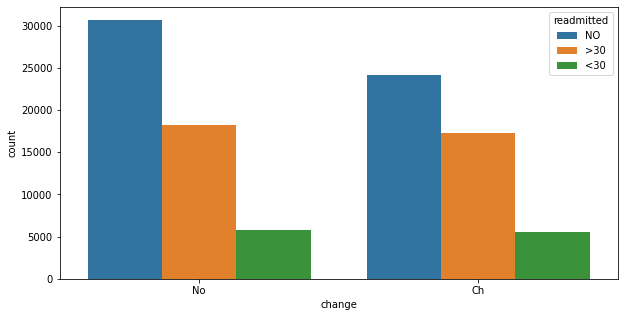

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="change", hue='readmitted', data=base)

### diabetesmed

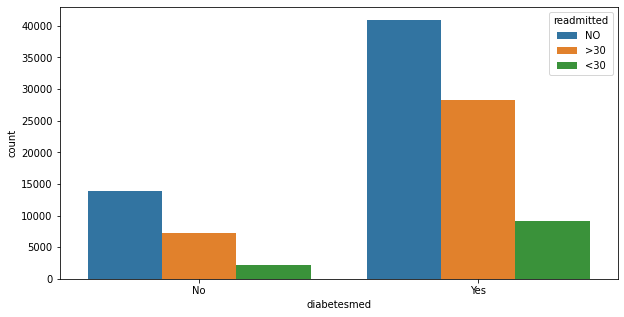

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="diabetesmed", hue='readmitted', data=base)

### max_glu_serum

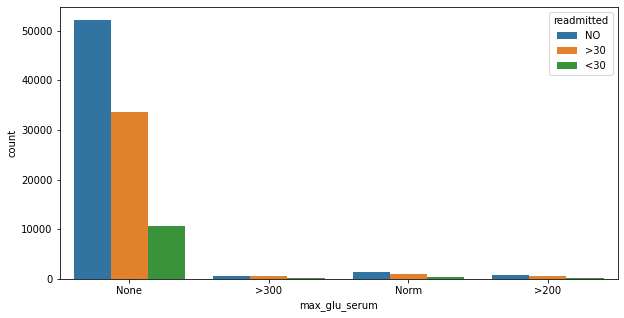

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="max_glu_serum", hue='readmitted', data=base)

### a1cresult

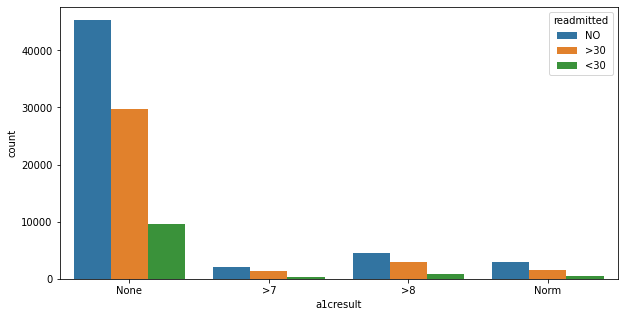

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="a1cresult", hue='readmitted', data=base)

### insulin

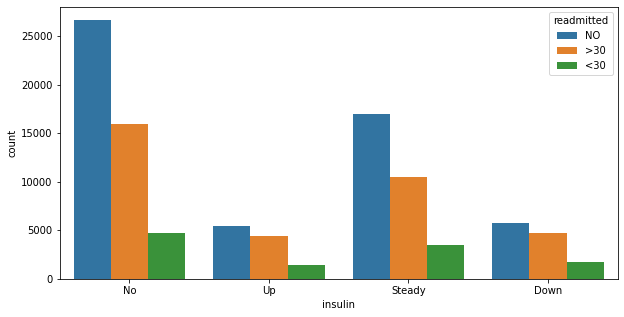

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="insulin", hue='readmitted', data=base)

In [ ]:
base.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'a1cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted'],
      dtype='object')

## Analizar presencia de Nulos

Reemplazo de valores atipicos que pueden ser considerados como valores nulos, en este caso los valores de **?, NULL, Not Available, Not Mapped**  lo vamos a tomar como un valor nulo

In [ ]:
# Reemplazo de valores atipicos que pueden ser considerados como valores nulos, en este caso los valores de ?, NULL
#Not Available,  lo vamos a tomar como un valor nulo
base.replace("?",np.nan, inplace=True)
base.replace("NULL",np.nan, inplace=True)
base.replace("Not Mapped",np.nan, inplace=True)
base.replace("Not Available ",np.nan, inplace=True)

#Solo se considera dos categorias de la varible genero Female y Male, por lo que la otra categoria se descarta como valor nulo
base["gender"].replace("Unknown/Invalid",np.nan, inplace=True)
base.head(3)

,,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed,readmitted
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,NaN,NaN,Physician Referral,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,Emergency,Discharged to home,Emergency Room,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),NaN,Emergency,Discharged to home,Emergency Room,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


In [ ]:
# validacion de registros que contienen valores nulos

filtro_nulos=pd.DataFrame(base.isnull().sum()/base.shape[0], columns=["filtro_nulos"])
filtro_nulos[filtro_nulos.filtro_nulos> 0]

,filtro_nulos
race,0.022336
gender,0.000029
weight,0.968585
admission_type_id,0.055136
discharge_disposition_id,0.045988
admission_source_id,0.068215
payer_code,0.395574
medical_specialty,0.490822
diag_1,0.000206
diag_2,0.003518


Se elimina la variable **weight** ya que gran parte de esta no se encuentra informada

In [ ]:
base=base.drop(["weight"],axis=1)

Para las variables con mayor de 30% y menos del 90%, se valida la moda de los registros no nulos

In [ ]:
pd.value_counts(base["payer_code"])/base.shape[0]

MC    0.318761
HM    0.061651
SP    0.049201
BC    0.045742
MD    0.034707
CP    0.024890
UN    0.024055
CM    0.019034
OG    0.010151
PO    0.005817
DM    0.005395
CH    0.001435
WC    0.001327
OT    0.000934
MP    0.000776
SI    0.000540
FR    0.000010
Name: payer_code, dtype: float64

Reemplazamos nulos por el valor de la moda en las varaibles requeridas	 

In [ ]:
# Reemplazamos nulos por el valor de la moda en las varaibles "payer_code" y	"medical_specialty"	 

base["race"].fillna(base["race"].mode()[0], inplace=True)
base["gender"].fillna(base["gender"].mode()[0], inplace=True)
base["admission_type_id"].fillna(base["admission_type_id"].mode()[0], inplace=True)
base["discharge_disposition_id"].fillna(base["discharge_disposition_id"].mode()[0], inplace=True)
base["admission_source_id"].fillna(base["admission_source_id"].mode()[0], inplace=True)
base["payer_code"].fillna(base["payer_code"].mode()[0], inplace=True)
base["medical_specialty"].fillna(base["medical_specialty"].mode()[0], inplace=True)
base["diag_1"].fillna(base["diag_1"].mode()[0], inplace=True)
base["diag_2"].fillna(base["diag_2"].mode()[0], inplace=True)
base["diag_3"].fillna(base["diag_3"].mode()[0], inplace=True)

## Revisión de Outliers

In [ ]:
columns_numericas = base.select_dtypes(include = np.number).columns.values
columns_numericas

array(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'], dtype=object)

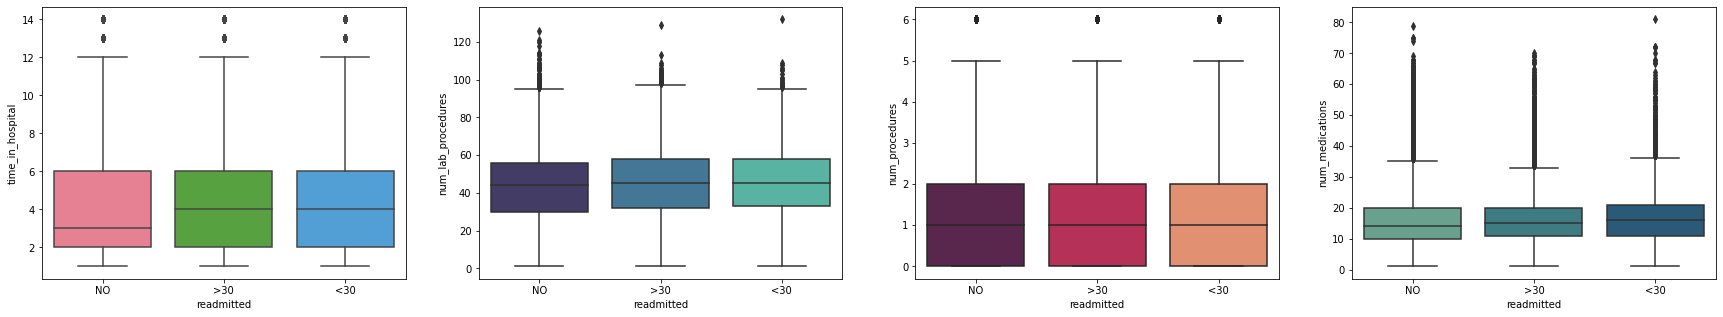

In [ ]:
f, axes = plt.subplots(1, 4, figsize=(30,5))
sns.boxplot(x=base['readmitted'],y=base['time_in_hospital'],palette='husl',ax=axes[0])
sns.boxplot(x=base['readmitted'],y=base['num_lab_procedures'],palette='mako',ax=axes[1])
sns.boxplot(x=base['readmitted'],y=base['num_procedures'],palette='rocket',ax=axes[2])
sns.boxplot(x=base['readmitted'],y=base['num_medications'],palette='crest',ax=axes[3])

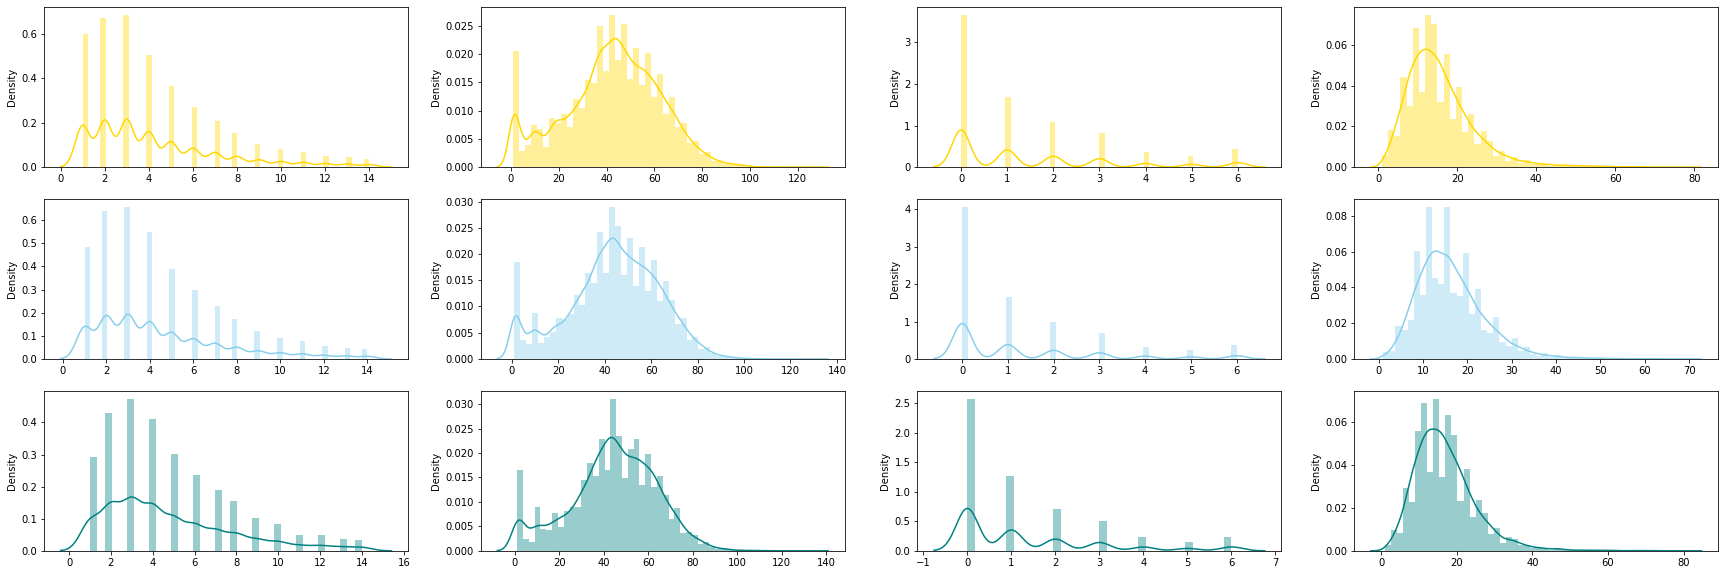

In [ ]:
f, axes = plt.subplots(3, 4, figsize=(30,10))
sns.distplot( x=base[base['readmitted']=='NO']["time_in_hospital"],color='gold',ax=axes[0,0])
sns.distplot( x=base[base['readmitted']=='>30']["time_in_hospital"],color='skyblue',ax=axes[1,0])
sns.distplot( x=base[base['readmitted']=='<30']["time_in_hospital"],color='teal',ax=axes[2,0])
sns.distplot( x=base[base['readmitted']=='NO']["num_lab_procedures"],color='gold',ax=axes[0,1])
sns.distplot( x=base[base['readmitted']=='>30']["num_lab_procedures"],color='skyblue',ax=axes[1,1])
sns.distplot( x=base[base['readmitted']=='<30']["num_lab_procedures"],color='teal',ax=axes[2,1])
sns.distplot( x=base[base['readmitted']=='NO']["num_procedures"],color='gold',ax=axes[0,2])
sns.distplot( x=base[base['readmitted']=='>30']["num_procedures"],color='skyblue',ax=axes[1,2])
sns.distplot( x=base[base['readmitted']=='<30']["num_procedures"],color='teal',ax=axes[2,2])
sns.distplot( x=base[base['readmitted']=='NO']["num_medications"],color='gold',ax=axes[0,3])
sns.distplot( x=base[base['readmitted']=='>30']["num_medications"],color='skyblue',ax=axes[1,3])
sns.distplot( x=base[base['readmitted']=='<30']["num_medications"],color='teal',ax=axes[2,3])


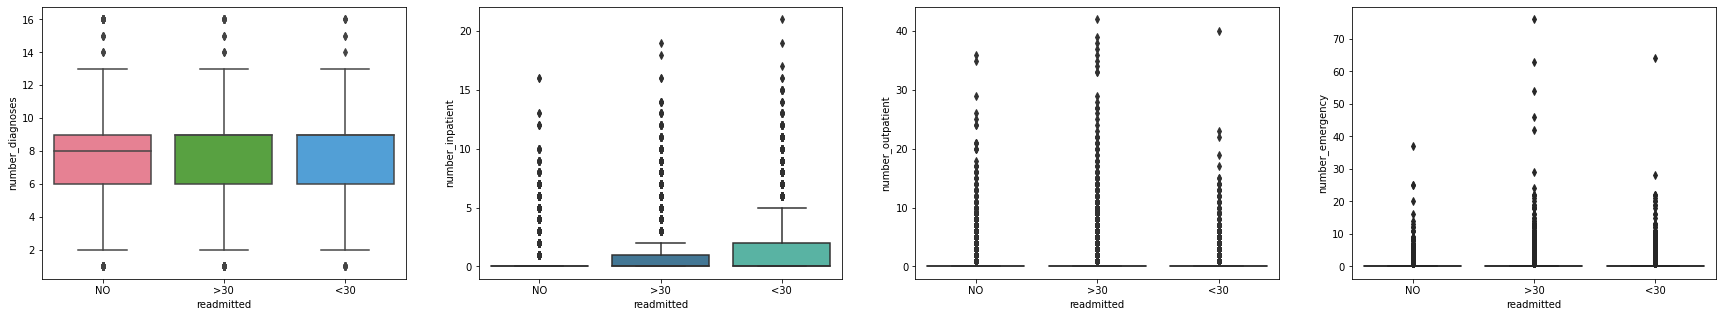

In [ ]:
f, axes = plt.subplots(1, 4, figsize=(30,5))
sns.boxplot(x=base['readmitted'],y=base['number_diagnoses'],palette='husl',ax=axes[0])
sns.boxplot(x=base['readmitted'],y=base['number_inpatient'],palette='mako',ax=axes[1])
sns.boxplot(x=base['readmitted'],y=base['number_outpatient'],palette='crest',ax=axes[2])
sns.boxplot(x=base['readmitted'],y=base['number_emergency'],palette='rocket',ax=axes[3])

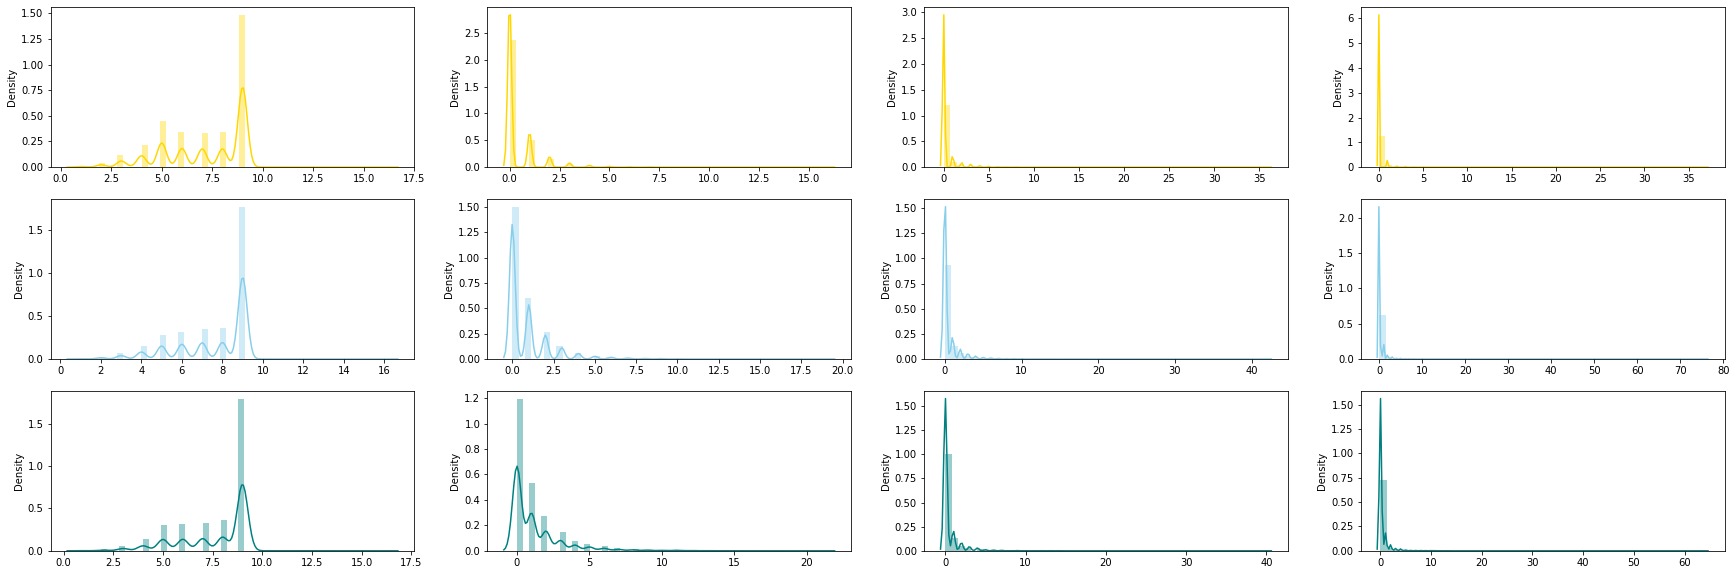

In [ ]:
f, axes = plt.subplots(3, 4, figsize=(30,10))
sns.distplot( x=base[base['readmitted']=='NO']["number_diagnoses"],color='gold',ax=axes[0,0])
sns.distplot( x=base[base['readmitted']=='>30']["number_diagnoses"],color='skyblue',ax=axes[1,0])
sns.distplot( x=base[base['readmitted']=='<30']["number_diagnoses"],color='teal',ax=axes[2,0])
sns.distplot( x=base[base['readmitted']=='NO']["number_inpatient"],color='gold',ax=axes[0,1])
sns.distplot( x=base[base['readmitted']=='>30']["number_inpatient"],color='skyblue',ax=axes[1,1])
sns.distplot( x=base[base['readmitted']=='<30']["number_inpatient"],color='teal',ax=axes[2,1])
sns.distplot( x=base[base['readmitted']=='NO']["number_outpatient"],color='gold',ax=axes[0,2])
sns.distplot( x=base[base['readmitted']=='>30']["number_outpatient"],color='skyblue',ax=axes[1,2])
sns.distplot( x=base[base['readmitted']=='<30']["number_outpatient"],color='teal',ax=axes[2,2])
sns.distplot( x=base[base['readmitted']=='NO']["number_emergency"],color='gold',ax=axes[0,3])
sns.distplot( x=base[base['readmitted']=='>30']["number_emergency"],color='skyblue',ax=axes[1,3])
sns.distplot( x=base[base['readmitted']=='<30']["number_emergency"],color='teal',ax=axes[2,3])


In [ ]:
base.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'a1cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted'],
      dtype='object')

In [ ]:
base.head(5)

,,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed,readmitted
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),Emergency,Discharged to home,Physician Referral,1,MC,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,276,250,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,MC,InternalMedicine,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,MC,InternalMedicine,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,MC,InternalMedicine,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,MC,InternalMedicine,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
pd.value_counts(base["readmitted"])/base.shape[0]

NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

In [13]:
base[base['readmitted']=='<30'].describe( include = np.number)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000
mean,4.768249,44.226028,1.280884,16.903143,0.436911,0.357313,1.224003,7.692789
std,3.028165,19.276087,1.635992,8.096696,1.302788,1.370384,1.954577,1.773477
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,33.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,45.000000,1.000000,16.000000,0.000000,0.000000,0.000000,9.000000
75%,6.000000,58.000000,2.000000,21.000000,0.000000,0.000000,2.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,40.000000,64.000000,21.000000,16.000000


In [14]:
base[base['readmitted']!='<30'].describe( include = np.number)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,90409.000000,90409.000000,90409.000000,90409.000000,90409.000000,90409.000000,90409.000000,90409.000000
mean,4.349224,42.953644,1.347123,15.911137,0.360871,0.177803,0.561648,7.388667
std,2.976382,19.719348,1.714242,8.124725,1.262484,0.857353,1.125315,1.950151
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,129.000000,6.000000,79.000000,42.000000,76.000000,19.000000,16.000000


## Base auxiliar para transformaciones

 Crear base de copia para no afectar el tratamiento previo

In [ ]:
df=base.copy()

## Re-Clasificación de categorías
Se presentan muchas categorias por variables, así que se procede a unificar en categorias más generales

### readmitted

In [ ]:
df.loc[(df.readmitted=='<30'),'y_bool' ]=1
df.loc[(df.readmitted=='NO') | (df.readmitted=='>30')  ,'y_bool' ]=0

### race

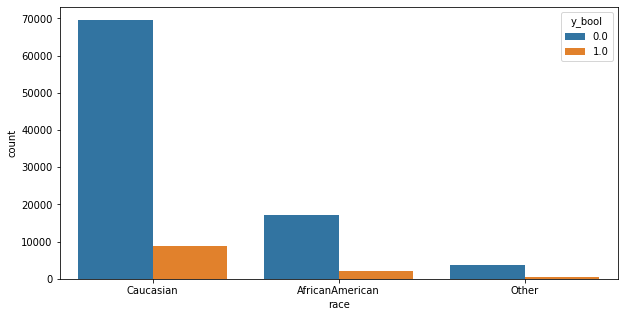

In [ ]:
df.loc[df['race'].isin(['Asian','Hispanic','?']),'race']='Other'
plt.figure(figsize=(10,5))
sns.countplot(x="race", hue='y_bool', data=df)

### age

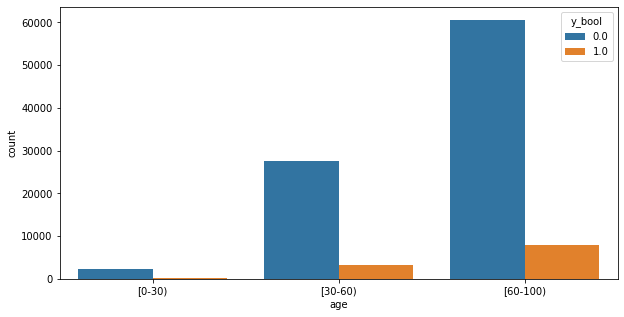

In [ ]:

df.loc[df['age'].isin(['[0-10)','[10-20)','[20-30)']),'age']='[0-30)'
df.loc[df['age'].isin(['[30-40)','[40-50)','[50-60)']),'age']='[30-60)'
df.loc[df['age'].isin(['[60-70)','[70-80)','[80-90)','[90-100)']),'age']='[60-100)'
plt.figure(figsize=(10,5))
sns.countplot(x="age", hue='y_bool', data=df)

### admission_type_id

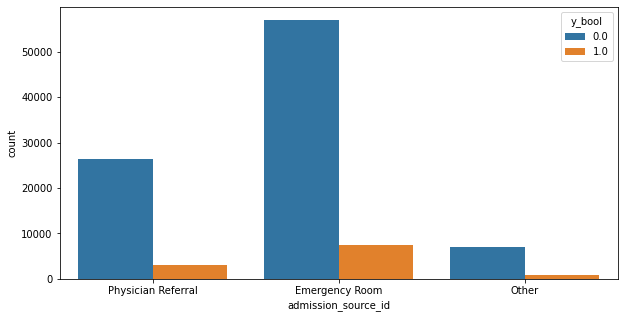

In [ ]:
df.loc[df['admission_type_id'].isin(['Newborn','Trauma Center','NULL','Not Mapped']),'admission_type_id']='Not Available'

df.loc[df['admission_source_id'].isin(['Transfer from Ambulatory Surgery Center','Transfer from a Skilled Nursing Facility (SNF)',
                                       'Transfer from a hospital','Transfer from another health care facility','Transfer from critial access hospital',
                                       'Transfer from hospital inpt/same fac reslt in a sep claim',
                                        'Court/Law Enforcement','Extramural Birth','Normal Delivery','Not Available','Sick Baby','HMO Referral',
                                       'Not Mapped','Clinic Referral','NULL']),'admission_source_id']='Other' 
plt.figure(figsize=(10,5))
sns.countplot(x="admission_source_id", hue='y_bool', data=df)                                      

### discharge_disposition_id

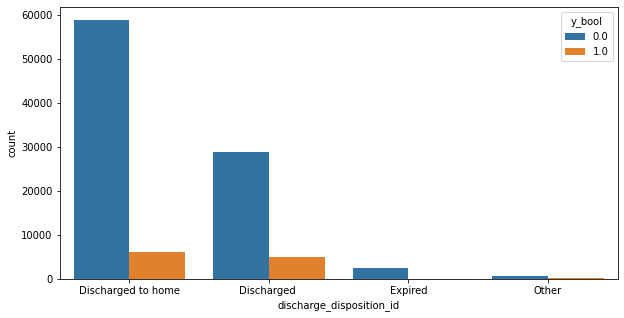

In [ ]:
df.loc[df['discharge_disposition_id'].isin(['Expired','Expired at home. Medicaid only, hospice','Expired in a medical facility. Medicaid only, hospice.',
                                            'Expired at home. Medicaid only, hospice.','Hospice / home','Hospice / medical facility']),'discharge_disposition_id']='Expired'
df.loc[df['discharge_disposition_id'].isin(['Left AMA','Neonate discharged to another hospital for neonatal aftercare',
                                            'Still patient or expected to return for outpatient services','Admitted as an inpatient to this hospital',
                                            'Not Mapped','NULL']),'discharge_disposition_id']='Other'
df.loc[df['discharge_disposition_id'].isin(['Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
                                            'Discharged/transferred to home under care of Home IV provider',
                                            'Discharged/transferred to SNF',
                                            'Discharged/transferred to home with home health service',
                                            'Discharged/transferred to another short term hospital',
                                            'Discharged/transferred to another type of inpatient care institution',
                                            'Discharged/transferred within this institution to Medicare approved swing bed',
                                            'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
                                            'Discharged/transferred/referred to this institution for outpatient services',
                                            'Discharged/transferred/referred another institution for outpatient services',
                                            'Discharged/transferred to a federal health care facility.',
                                            'Discharged/transferred to a long term care hospital.',
                                            'Discharged/transferred to ICF',
                                            'Discharged/transferred to another rehab fac including rehab units of a hospital.']),'discharge_disposition_id']='Discharged '
plt.figure(figsize=(10,5))
sns.countplot(x="discharge_disposition_id", hue='y_bool', data=df)                                  

### medical_specialty

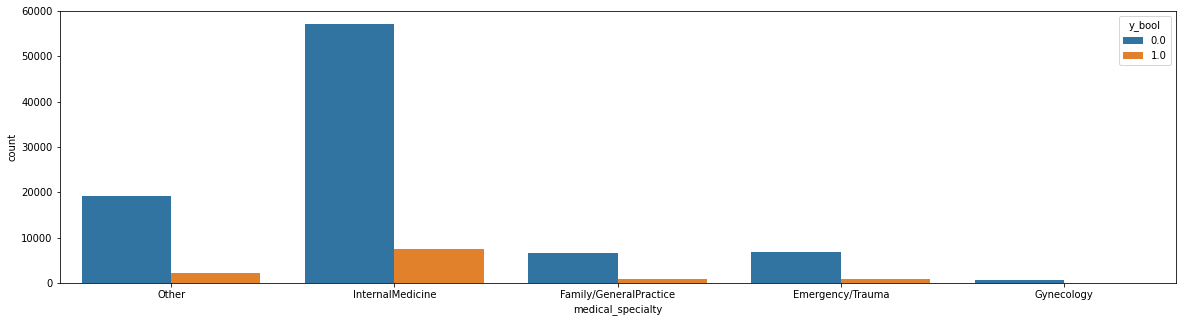

In [ ]:
df.loc[df['medical_specialty'].isin(['Cardiology-Pediatric']),'medical_specialty']='Cardiology'
df.loc[df['medical_specialty'].isin(['Neurology','Neurophysiology','Psychiatry-Addictive','Psychiatry-Child/Adolescent','Psychology','Psychiatry']),'medical_specialty']='Nephrology'
df.loc[df['medical_specialty'].isin(['Orthopedics-Reconstructive','Osteopath']),'medical_specialty']='Orthopedics'
df.loc[df['medical_specialty'].isin(['Pediatrics-AllergyandImmunology','Pediatrics-CriticalCare','Pediatrics-EmergencyMedicine','Pediatrics-Endocrinology',
                                     'Pediatrics-Hematology-Oncology','Pediatrics-InfectiousDiseases','Pediatrics-Neurology',
                                     'Pediatrics-Pulmonology']),'medical_specialty']='Pediatrics'

df.loc[df['medical_specialty'].isin(['Radiology']),'medical_specialty']='Radiologist'                                    

df.loc[df['medical_specialty'].isin(['Surgeon','Surgery-Cardiovascular','Surgery-Cardiovascular/Thoracic','Surgery-Colon&Rectal',
                                     'Surgery-General','Surgery-Maxillofacial','Surgery-Neuro','Surgery-Pediatric','Surgery-Plastic',
                                     'Surgery-PlasticwithinHeadandNeck','Surgery-Thoracic','Surgery-Vascular','SurgicalSpecialty']),'medical_specialty']='Surgery-General'    
df.loc[df['medical_specialty'].isin(['Obsterics&Gynecology-GynecologicOnco','Obstetrics','ObstetricsandGynecology']),'medical_specialty']='Gynecology'
df.loc[~df['medical_specialty'].isin(['InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology',
                                      'Surgery-General','Nephrology','Gynecology','Orthopedics','Psychiatry','Radiologist']),'medical_specialty']='Other'
  
df.loc[df['medical_specialty'].isin(['Orthopedics','Nephrology','Radiologist','Cardiology','Surgery-General']),'medical_specialty']='Other'  
plt.figure(figsize=(20,5))
sns.countplot(x="medical_specialty", hue='y_bool', data=df)  

## Exploración de variables con la asignación binaria del objetivo

### change

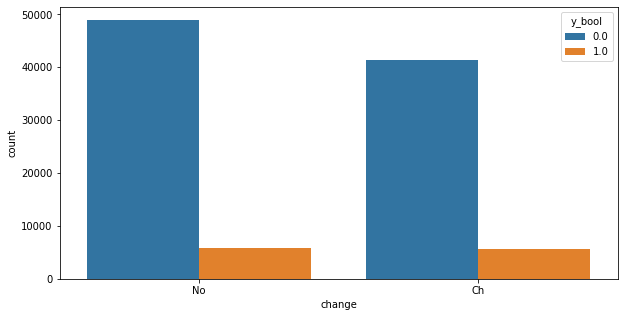

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="change", hue='y_bool', data=df)

### max_glu_serum

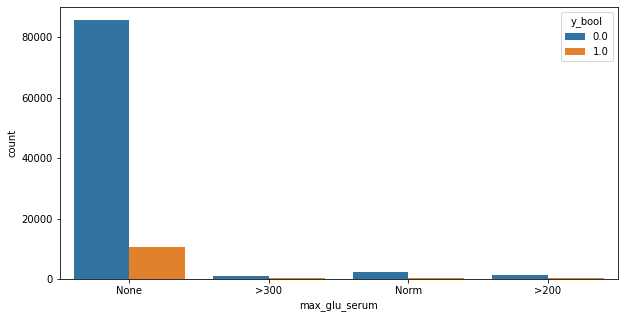

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="max_glu_serum", hue='y_bool', data=df)

### a1cresult

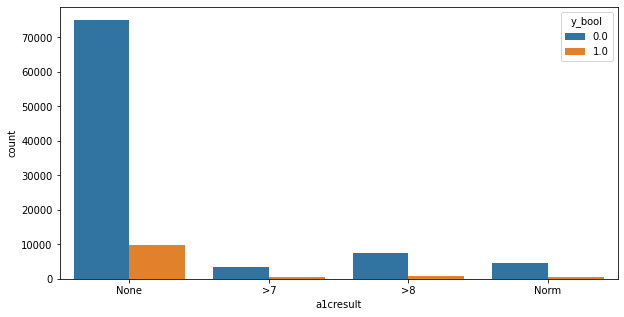

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="a1cresult", hue='y_bool', data=df)

### insulin

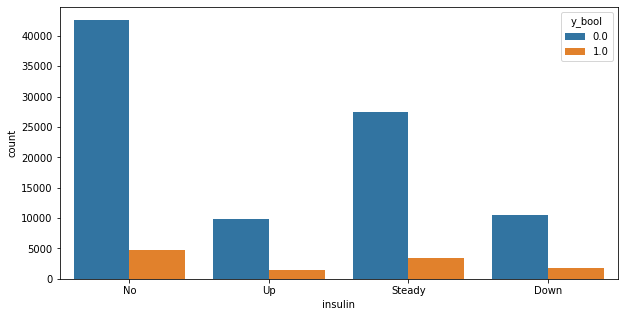

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="insulin", hue='y_bool', data=df)

### diabetesmed

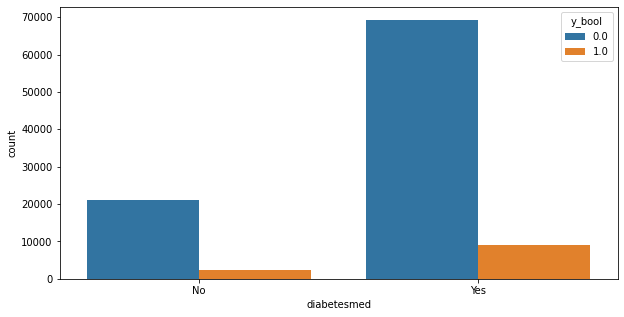

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="diabetesmed", hue='y_bool', data=df)

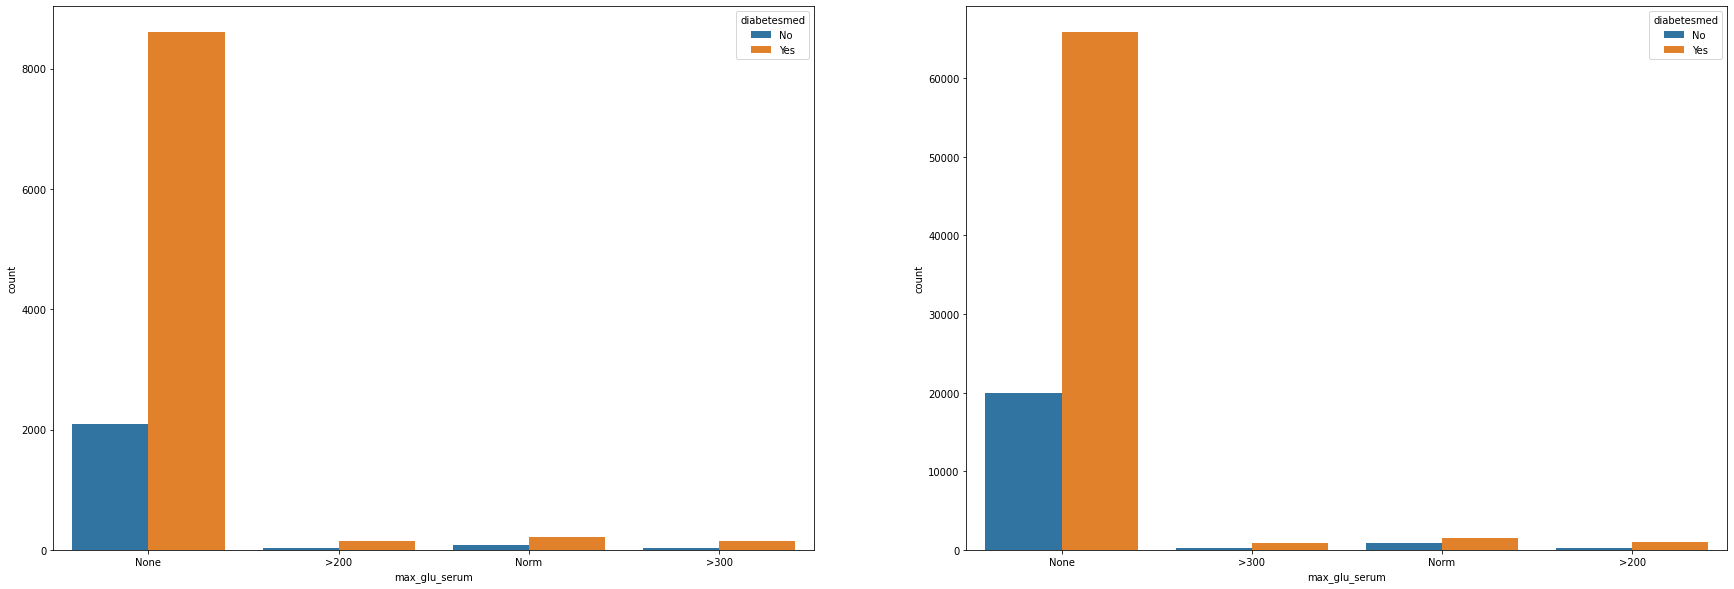

In [21]:
f, axes = plt.subplots(1, 2, figsize=(30,10))
sns.countplot( x=base[base['readmitted']=='<30']["max_glu_serum"], hue='diabetesmed', data=base,ax=axes[0])
sns.countplot( x=base[base['readmitted']!='<30']["max_glu_serum"], hue='diabetesmed', data=base,ax=axes[1])

## Eliminación de variables sin información suficiente

Son más categorias de lo que se pueden agrupar y no hay criterio claro para realizar tal agrupación, por lo que se procede a eliminar la siguientes variables.

In [ ]:
df=df.drop(['payer_code','diag_1','diag_2','diag_3'], axis=1)

### Validación de valores únicos por variable final

In [ ]:
serie = df.nunique()
serie

race                          3
gender                        2
age                           3
admission_type_id             4
discharge_disposition_id      4
admission_source_id           3
time_in_hospital             14
medical_specialty             5
num_lab_procedures          118
num_procedures                7
num_medications              75
number_outpatient            39
number_emergency             33
number_inpatient             21
number_diagnoses             16
max_glu_serum                 4
a1cresult                     4
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglitazone                  4
rosiglitazone                 4
acarbose                      4
miglitol                      4
troglitazone                  2
tolazami

## Transformación de variables categóricas a booleanas

In [ ]:
df=df.drop(['readmitted'],axis=1)

In [ ]:
categoricas=df.select_dtypes(include=np.object)
categoricas
categoricas.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'medical_specialty',
       'max_glu_serum', 'a1cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed'],
      dtype='object')

In [ ]:

categoricas.shape

(101766, 32)

Obtención de variables dummies por cada categoria de las variables categóricas

In [ ]:
df_dummies=pd.get_dummies(df,columns=categoricas.columns)
df_dummies.head(3)

,,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,y_bool,race_AfricanAmerican,race_Caucasian,race_Other,gender_Female,gender_Male,age_[0-30),age_[30-60),age_[60-100),admission_type_id_Elective,admission_type_id_Emergency,admission_type_id_Not Available,admission_type_id_Urgent,discharge_disposition_id_Discharged,discharge_disposition_id_Discharged to home,discharge_disposition_id_Expired,discharge_disposition_id_Other,admission_source_id_Emergency Room,admission_source_id_Other,admission_source_id_Physician Referral,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_Gynecology,medical_specialty_InternalMedicine,medical_specialty_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,a1cresult_>7,a1cresult_>8,a1cresult_None,...,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide_metformin_Down,glyburide_metformin_No,glyburide_metformin_Steady,glyburide_metformin_Up,glipizide_metformin_No,glipizide_metformin_Steady,glimepiride_pioglitazone_No,glimepiride_pioglitazone_Steady,metformin_rosiglitazone_No,metformin_rosiglitazone_Steady,metformin_pioglitazone_No,metformin_pioglitazone_Steady,change_Ch,change_No,diabetesmed_No,diabetesmed_Yes
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,1,41,0,1,0,0,0,1,0.0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
149190,55629189,3,59,0,18,0,0,0,9,0.0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
64410,86047875,2,11,5,13,2,0,1,6,0.0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1


## Correlación de Variables

Validación de correlación más altas con relación a la variable objetivo binaria

In [ ]:
#validación de las variables que tienen una correlación superior al 5%
df_numerical_corr = df_dummies.corr()['y_bool']
df_numerical_most_corr = df_numerical_corr[abs(df_numerical_corr) > 0.01].sort_values(ascending=False)
df_numerical_most_corr

y_bool                                         1.000000
number_inpatient                               0.165147
discharge_disposition_id_Discharged            0.085534
number_emergency                               0.060747
number_diagnoses                               0.049524
time_in_hospital                               0.044199
num_medications                                0.038432
insulin_Down                                   0.032115
diabetesmed_Yes                                0.027125
metformin_No                                   0.022909
age_[60-100)                                   0.020623
insulin_Up                                     0.020563
num_lab_procedures                             0.020364
change_Ch                                      0.019506
number_outpatient                              0.018893
a1cresult_None                                 0.018665
admission_source_id_Emergency Room             0.016642
medical_specialty_InternalMedicine             0

In [ ]:
cor=df_numerical_most_corr.index
cor

Index(['y_bool', 'number_inpatient', 'discharge_disposition_id_Discharged ',
       'number_emergency', 'number_diagnoses', 'time_in_hospital',
       'num_medications', 'insulin_Down', 'diabetesmed_Yes', 'metformin_No',
       'age_[60-100)', 'insulin_Up', 'num_lab_procedures', 'change_Ch',
       'number_outpatient', 'a1cresult_None',
       'admission_source_id_Emergency Room',
       'medical_specialty_InternalMedicine', 'admission_type_id_Emergency',
       'max_glu_serum_>300', 'discharge_disposition_id_Other',
       'admission_source_id_Other', 'a1cresult_Norm',
       'admission_type_id_Elective', 'admission_source_id_Physician Referral',
       'a1cresult_>8', 'num_procedures', 'medical_specialty_Other',
       'medical_specialty_Gynecology', 'change_No', 'age_[30-60)',
       'metformin_Steady', 'diabetesmed_No', 'insulin_No',
       'discharge_disposition_id_Expired',
       'discharge_disposition_id_Discharged to home'],
      dtype='object')

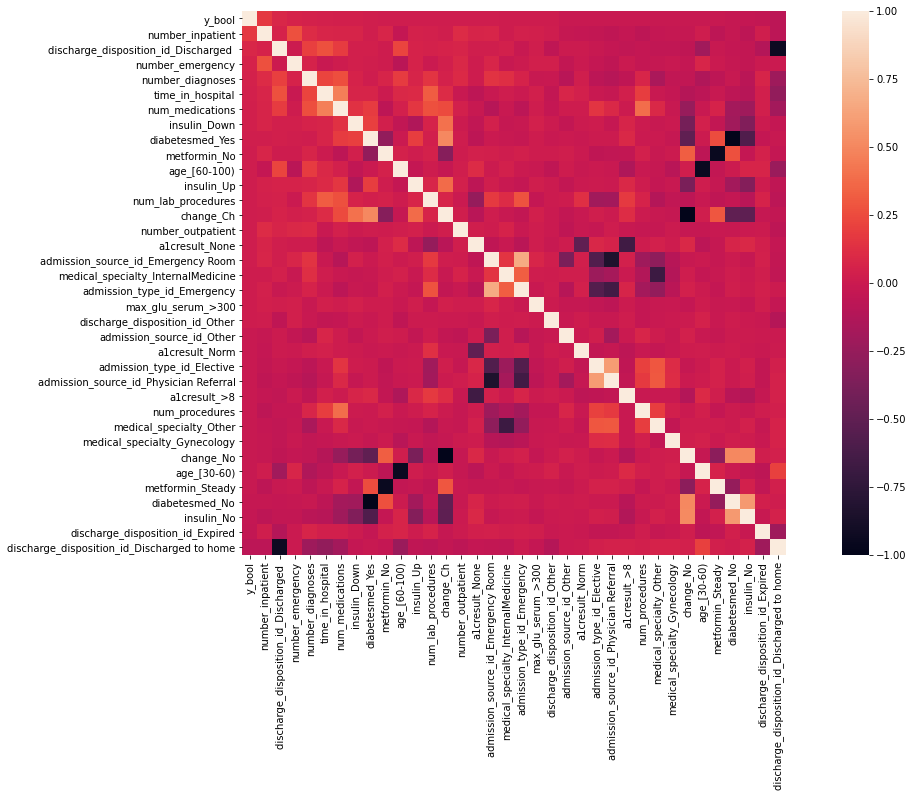

In [ ]:
filtros=df_dummies[cor]
plt.figure(figsize=(20,10))
sns.heatmap(filtros.corr(), square=True, annot=False)


Selección de variables según la correlación

In [ ]:
df_dummies2=df_dummies[cor]



## Balanceo de Data

Segmentación de base entre Train y Test para Entrenamiento y validación del modelo

In [142]:
muestra1=df_dummies2[df_dummies2['y_bool']==1]
muestra2=df_dummies2[df_dummies2['y_bool']==1].sample(frac=0.7, random_state=42)
muestra3=df_dummies2[df_dummies2['y_bool']==0].sample(frac=0.4, random_state=42)
final=pd.concat([muestra1,muestra2,muestra3])
print(pd.value_counts(final['y_bool'])/final.shape[0])
print(muestra1['y_bool'].count())
print(muestra2['y_bool'].count())
print(muestra3['y_bool'].count())
print(final['y_bool'].count())

0.0    0.651944
1.0    0.348056
Name: y_bool, dtype: float64
11357
7950
36164
55471


## Segmentación de base en Train/ Validation

In [143]:
# Dividimos train/test. Normalizamos
X=final.drop(['y_bool'], axis=1)
Y=final[['y_bool']]
X0_train, X0_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(pd.value_counts(Y_train['y_bool'])/Y_train.shape[0])
print(pd.value_counts(Y_test['y_bool'])/Y_test.shape[0])

0.0    0.653403
1.0    0.346597
Name: y_bool, dtype: float64
0.0    0.64854
1.0    0.35146
Name: y_bool, dtype: float64


## Estandarización de Variables

In [144]:
transformer = StandardScaler().fit(X0_train)  # X0--> Datos originales, X --> Normalizados
X_train = transformer.transform(X0_train)
X_test = transformer.transform(X0_test)

In [145]:
X0_train.columns

Index(['number_inpatient', 'discharge_disposition_id_Discharged ',
       'number_emergency', 'number_diagnoses', 'time_in_hospital',
       'num_medications', 'insulin_Down', 'diabetesmed_Yes', 'metformin_No',
       'age_[60-100)', 'insulin_Up', 'num_lab_procedures', 'change_Ch',
       'number_outpatient', 'a1cresult_None',
       'admission_source_id_Emergency Room',
       'medical_specialty_InternalMedicine', 'admission_type_id_Emergency',
       'max_glu_serum_>300', 'discharge_disposition_id_Other',
       'admission_source_id_Other', 'a1cresult_Norm',
       'admission_type_id_Elective', 'admission_source_id_Physician Referral',
       'a1cresult_>8', 'num_procedures', 'medical_specialty_Other',
       'medical_specialty_Gynecology', 'change_No', 'age_[30-60)',
       'metformin_Steady', 'diabetesmed_No', 'insulin_No',
       'discharge_disposition_id_Expired',
       'discharge_disposition_id_Discharged to home'],
      dtype='object')

# Modelos ML

## Selección de Variables a partir de penalización L1 y L2

### Modelo de Regularización L2

#### Tuneo de optimización de Parámetros y Desempeño

In [146]:
# Entrenamiento RL con validación parámetro de regularización L2
rango_C = np.logspace(-2, 1, 20)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^-2, a 10^1.
diccionario_parametros = [{'C': rango_C}]
nfold = 5 # Número de particiones train/validación

RL_L2  = GridSearchCV(estimator=LR(penalty='l2',max_iter=1e6),param_grid=diccionario_parametros,cv=nfold)
RL_L2.fit(X_train,Y_train)
                    
accuracy_train_rl_l2 = RL_L2.score(X_train,Y_train)
accuracy_test_rl_l2 = RL_L2.score(X_test,Y_test)

print("El parámetro de regularización seleccionado es C={0:.2f}".format(RL_L2.best_params_['C']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_rl_l2*100, accuracy_test_rl_l2*100))
print("\n Precision P = {0:.2f}".format(precision_score(Y_test,RL_L2.predict(X_test))))
print("\n Recall R = {0:.2f}".format(recall_score(Y_test,RL_L2.predict(X_test))))
print("\n F1 score, F1 = {0:.2f}".format(f1_score(Y_test,RL_L2.predict(X_test))))


El parámetro de regularización seleccionado es C=0.01
Accuracy train 67.31%. Accuracy test 66.84%


 Precision P = 0.60

 Recall R = 0.18

 F1 score, F1 = 0.27


#### Importancia de variables

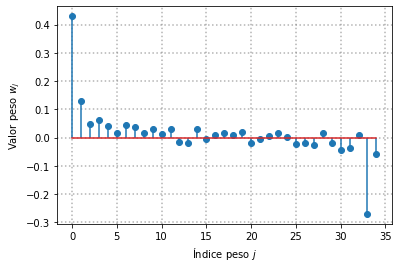

In [147]:
fig,ax = plt.subplots()

plt.stem(RL_L2.best_estimator_.coef_.T,use_line_collection=True)
plt.xlabel(r'Índice peso $j$')
plt.ylabel(r'Valor peso $w_j$')
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

plt.show()

In [148]:
coef_series = pd.Series(RL_L2.best_estimator_.coef_[0,:])
coef_campos = pd.Series(X0_train.columns)
df1 = pd.DataFrame({ 'Variables_l1': coef_series, 
                    'coeficiente': coef_campos})

df1

,Variables_l1,coeficiente
0,0.429298,number_inpatient
1,0.129727,discharge_disposition_id_Discharged
2,0.048159,number_emergency
3,0.063660,number_diagnoses
4,0.042411,time_in_hospital
5,0.017903,num_medications
6,0.045549,insulin_Down
7,0.038429,diabetesmed_Yes
8,0.016224,metformin_No
9,0.029783,age_[60-100)


#### Matriz confusión L2

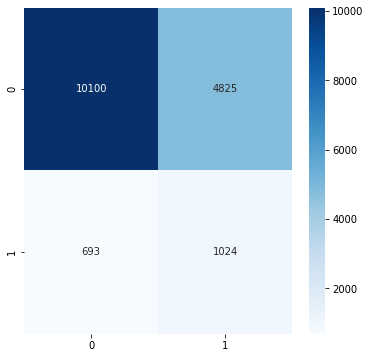

In [149]:
plt.figure(figsize = (6,6))

cf = confusion_matrix(RL_L2.predict(X_test),Y_test)
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , annot = True, fmt='')

### Modelo de Regularización L1

#### Tuneo de optimización de Parámetros y Desempeño

In [166]:
# Entrenamiento RL con validación parámetro de regularización L1
rango_C = np.logspace(-2, 1, 20)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^-2, a 10^1.
diccionario_parametros = [{'C': rango_C}]
nfold = 5 # Número de particiones train/validación

RL_L1  = GridSearchCV(estimator=LR(penalty='l1',max_iter=1e6,solver='liblinear'),
                           param_grid=diccionario_parametros,cv=nfold)
RL_L1.fit(X_train,Y_train)
                    
accuracy_train_rl_l1 = RL_L1.score(X_train,Y_train)
accuracy_test_rl_l1 = RL_L1.score(X_test,Y_test)

print("El parámetro de regularización seleccionado es C={0:.2f}".format(RL_L1.best_params_['C']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_rl_l1*100, accuracy_test_rl_l1*100))
print("\n Precision P = {0:.2f}".format(precision_score(Y_test,RL_L1.predict(X_test))))
print("\n Recall R = {0:.2f}".format(recall_score(Y_test,RL_L1.predict(X_test))))
print("\n F1 score, F1 = {0:.2f}".format(f1_score(Y_test,RL_L1.predict(X_test))))

El parámetro de regularización seleccionado es C=0.01
Accuracy train 67.18%. Accuracy test 66.71%


 Precision P = 0.60

 Recall R = 0.16

 F1 score, F1 = 0.25


#### Importancia de Variables

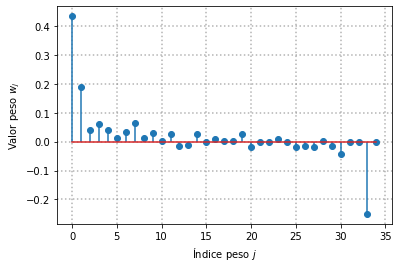

In [151]:
fig,ax = plt.subplots()

plt.stem(RL_L1.best_estimator_.coef_.T,use_line_collection=True)
plt.xlabel(r'Índice peso $j$')
plt.ylabel(r'Valor peso $w_j$')
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

plt.show()

In [152]:
coef_series = pd.Series(RL_L1.best_estimator_.coef_[0,:])
coef_campos = pd.Series(X0_train.columns)
df2 = pd.DataFrame({ 'Variables_l2': coef_series, 
                    'coeficiente': coef_campos})

df_u=pd.merge(df1,df2,on='coeficiente',how='left')
df_u

,Variables_l1,coeficiente,Variables_l2
0,0.429298,number_inpatient,0.433895
1,0.129727,discharge_disposition_id_Discharged,0.187716
2,0.048159,number_emergency,0.041331
3,0.063660,number_diagnoses,0.061154
4,0.042411,time_in_hospital,0.040492
5,0.017903,num_medications,0.013393
6,0.045549,insulin_Down,0.034633
7,0.038429,diabetesmed_Yes,0.063931
8,0.016224,metformin_No,0.014178
9,0.029783,age_[60-100),0.031578


#### Matriz de confusión L1

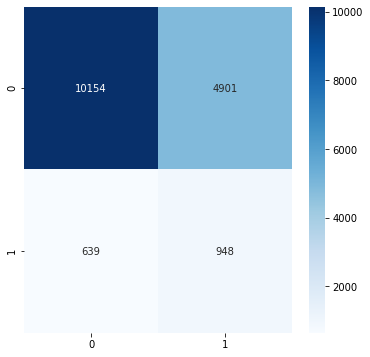

In [167]:
plt.figure(figsize = (6,6))

cf = confusion_matrix(RL_L1.predict(X_test),Y_test)
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , annot = True, fmt='')

### Selección de Variables

In [153]:
var_fin=df_u[(abs(df_u.Variables_l2>0)) & (df_u.coeficiente !='diabetesmed_No')][['coeficiente']]
var_fin.set_index(['coeficiente'], inplace=True)
var=var_fin.index
var

Index(['number_inpatient', 'discharge_disposition_id_Discharged ',
       'number_emergency', 'number_diagnoses', 'time_in_hospital',
       'num_medications', 'insulin_Down', 'diabetesmed_Yes', 'metformin_No',
       'age_[60-100)', 'insulin_Up', 'num_lab_procedures', 'a1cresult_None',
       'medical_specialty_InternalMedicine', 'admission_type_id_Emergency',
       'max_glu_serum_>300', 'discharge_disposition_id_Other',
       'admission_source_id_Physician Referral', 'change_No'],
      dtype='object', name='coeficiente')

In [154]:
X0_train=X0_train[var]
X0_test=X0_test[var]

In [155]:
transformer_diab = StandardScaler().fit(X0_train)  # X0--> Datos originales, X --> Normalizados
X_train = transformer_diab.transform(X0_train)
X_test = transformer_diab.transform(X0_test)

In [156]:
# Entrenamiento RL con validación parámetro de regularización L2
rango_C = np.logspace(-2, 1, 20)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^-2, a 10^1.
diccionario_parametros = [{'C': rango_C}]
nfold = 5 # Número de particiones train/validación



RL_L2  = GridSearchCV(estimator=LR(penalty='l2',max_iter=1e6),param_grid=diccionario_parametros,cv=nfold)
RL_L2.fit(X_train,Y_train)
                    
accuracy_train_rl_l2 = RL_L2.score(X_train,Y_train)
accuracy_test_rl_l2 = RL_L2.score(X_test,Y_test)

print("El parámetro de regularización seleccionado es C={0:.2f}".format(RL_L2.best_params_['C']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_rl_l2*100, accuracy_test_rl_l2*100))
print("\n Precision P = {0:.2f}".format(precision_score(Y_test,RL_L2.predict(X_test))))
print("\n Recall R = {0:.2f}".format(recall_score(Y_test,RL_L2.predict(X_test))))
print("\n F1 score, F1 = {0:.2f}".format(f1_score(Y_test,RL_L2.predict(X_test))))

El parámetro de regularización seleccionado es C=0.03
Accuracy train 67.13%. Accuracy test 66.64%


 Precision P = 0.59

 Recall R = 0.17

 F1 score, F1 = 0.26


## Modelo Arboles de Decisión

#### Tuneo de optimización de Parámetros y Desempeño

In [157]:
# Entrenamiento DT con validación de profundidad

max_depth = 15
rango_profundidad = np.arange(1, max_depth+1)
nfold = 5
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
diccionario_parametros = [{'max_depth': rango_profundidad}]

# Validación cruzada con GridSearchCV
tree_diab = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=diccionario_parametros,cv=nfold)
# Entrenamiento
tree_diab.fit(X0_train,Y_train)
# Test
accuracy_train_dt = tree_diab.score(X0_train,Y_train)
accuracy_test_dt = tree_diab.score(X0_test,Y_test)

print("La profundidad seleccionada es depth={0:d}".format(tree_diab.best_params_['max_depth']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_dt*100, accuracy_test_dt*100))
print("\n Precision P = {0:.2f}".format(precision_score(Y_test,tree_diab.predict(X0_test))))
print("\n Recall R = {0:.2f}".format(recall_score(Y_test,tree_diab.predict(X0_test))))
print("\n F1 score, F1 = {0:.2f}".format(f1_score(Y_test,tree_diab.predict(X0_test))))

La profundidad seleccionada es depth=5
Accuracy train 67.57%. Accuracy test 66.75%


 Precision P = 0.57

 Recall R = 0.21

 F1 score, F1 = 0.31


In [158]:
DT = tree.DecisionTreeClassifier(max_leaf_nodes=5)
DT.fit(X0_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Visualización árbol

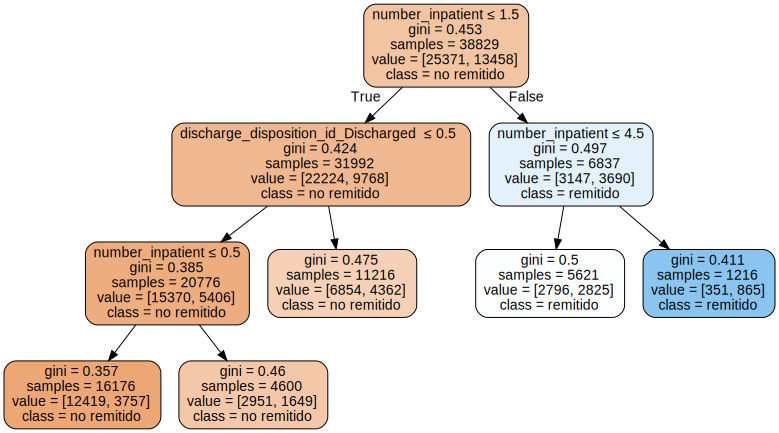

In [159]:
import graphviz
from sklearn import tree
dot_Data = tree.export_graphviz(DT, 
                                out_file=None, 
                                feature_names = X0_train.columns,
                               class_names=['no remitido','remitido'],
                                filled=True, 
                                rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_Data)
graph

#### Matriz de confusión

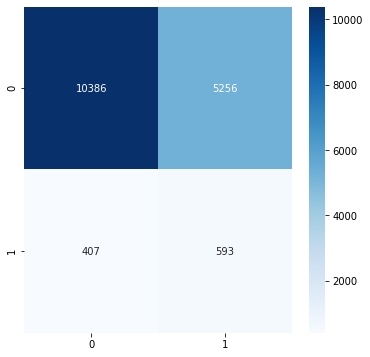

In [160]:
plt.figure(figsize = (6,6))

cf_tree = confusion_matrix(tree_diab.predict(X_test),Y_test)
sns.heatmap(cf_tree,cmap= "Blues", linecolor = 'black' , annot = True, fmt='')

## Modelo de Random Forest

#### Tuneo de optimización de Parámetros y Desempeño

In [161]:


rango_estimadores = [10,20,50,100,200]
rango_hojas = [2,3,4,5,10,20,50,100,200]
nfold = 5
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
diccionario_parametros = [{'n_estimators': rango_estimadores, 'max_leaf_nodes': rango_hojas}]

# Validación cruzada con GridSearchCV
RF_diab = GridSearchCV(RandomForestClassifier(), param_grid=diccionario_parametros,cv=nfold)
# Entrenamiento
RF_diab.fit(X0_train,Y_train)
# Test
accuracy_train_rf = RF_diab.score(X0_train,Y_train)
accuracy_test_rf = RF_diab.score(X0_test,Y_test)

print("El número de estimadores seleccionado es n_estimadores={0:d}".format(RF_diab.best_params_['n_estimators']))
print("El número de hojas máximo seleccionado es n_hojas={0:d}".format(RF_diab.best_params_['max_leaf_nodes']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_rf*100, accuracy_test_rf*100))
print("\n Precision P = {0:.2f}".format(precision_score(Y_test,RF_diab.predict(X0_test))))
print("\n Recall R = {0:.2f}".format(recall_score(Y_test,RF_diab.predict(X0_test))))
print("\n F1 score, F1 = {0:.2f}".format(f1_score(Y_test,RF_diab.predict(X0_test))))

El número de estimadores seleccionado es n_estimadores=50
El número de hojas máximo seleccionado es n_hojas=200
Accuracy train 69.43%. Accuracy test 67.25%


 Precision P = 0.63

 Recall R = 0.16

 F1 score, F1 = 0.26


### Importancia de Variables

In [171]:
for feature in zip(X0_test.columns, RF_diab.best_estimator_.feature_importances_):
    print(feature)

('number_inpatient', 0.3642369266404656)
('discharge_disposition_id_Discharged ', 0.1123920908086284)
('number_emergency', 0.07026067248549718)
('number_diagnoses', 0.054809127433886766)
('time_in_hospital', 0.07135145930756208)
('num_medications', 0.0871360849473972)
('insulin_Down', 0.0130190820057013)
('diabetesmed_Yes', 0.013921623611919016)
('metformin_No', 0.016026176552335774)
('age_[60-100)', 0.019523237398742312)
('insulin_Up', 0.009358103648171382)
('num_lab_procedures', 0.09756568797334741)
('a1cresult_None', 0.012022054546347135)
('medical_specialty_InternalMedicine', 0.013123804216334524)
('admission_type_id_Emergency', 0.01356682523440645)
('max_glu_serum_>300', 0.005316274888844209)
('discharge_disposition_id_Other', 0.004973260294416231)
('admission_source_id_Physician Referral', 0.010527806302105112)
('change_No', 0.010869701703891788)


### Matriz de confusión

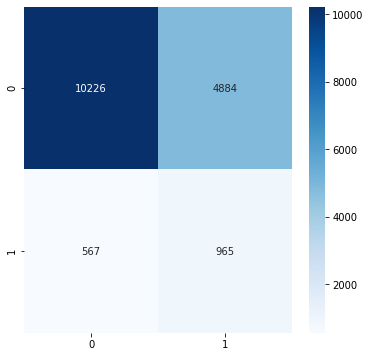

In [164]:
plt.figure(figsize = (6,6))

cf_rf = confusion_matrix(RF_diab.predict(X0_test),Y_test)
sns.heatmap(cf_rf,cmap= "Blues", linecolor = 'black' , annot = True, fmt='')

# INSIGHTS

 

*   **number_inpatient** (Número de visitas de paciente interno en elprevio año)   destaca como ser la variable más importante dentro de la decisión de los modelos de clasificación, dentro de si un paciente fue remitido ('0<30'), se observa que este tipo de pacientes la gran parte tuvo al menos entre dos y cinco visitas, en cambio un paciente que no fue remitido la gran parte o no tuvo o solo tuvo una visita a la clinica.
*  **discharge_disposition_id**  (Identificador de Alta), se identifica que los marcados como 'Expired', no registran pacientes remitidos, sin embargo es un bajo porcentaje. Entre los dado de alta en casa y por otro motivo, se destacan para definir los remitidos los dado de alta por otro motivo.

* **Glucose serum test result** Se observa que muchos de los pacientes, que han tenido antecendentes de diabetes  con **Diabetes medications** no se les hace toma de este test, por lo cual se recomienda tener más sensibilidad con este tipo de antecedentes.
